# Laboratory Report

**Group 4AE-SE TP1/2**

Members:
- Andrea Pérez Fernández 
- Martin Cheliz Calvo
- Léa Scheer

# LAB 1

# LAB 2

# LAB 3

## PART 1: Basic steps

Usingn an artificial dataset we will train a decision tree classifer.  

In [4]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 
import numpy as np

In [10]:
#Manually constructed dataset with random generation of arrays
X = np.random.randint(0,2,(10,4)) #10 samples and 4 features
Y = np.random.randint(0,2,10)

In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

## PART 2 : Visualization

We will now visualize the decision tree we just trained using the artificial dataset. 

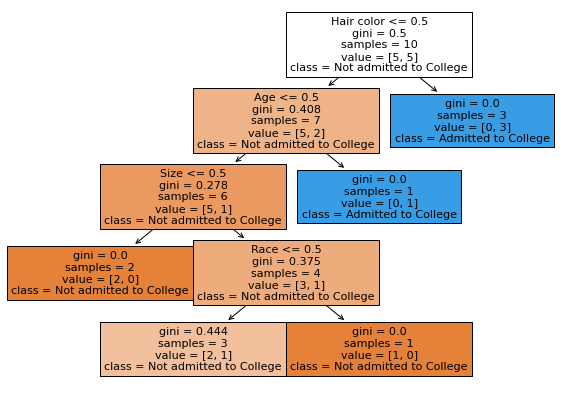

In [20]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("Age","Size" , "Race", "Hair color"),
                   class_names= ("Not admitted to College", "Admitted to College" ), 
                   filled=True)

## PART 3: The compass dataset 

### What are the features?
There are 11 different features in the original dataset like the sex, ethinicity and age of the person arrested. 

### How many samples in the dataset? 
There are 6172 valid samples in the dataset

### What are your expectations regarding the most importat features?
The most important features should have the highest impact trainig the classifier to predict recidivism

### Propose (informally) a way to reduce the dataset
We could drop columns that we feel will be less useful than others to train the classifier. There are other dimension reduction techniques like Principal Component Analysis. We could also randomly drop some samples from the dataset. 

### There many ways to binarize the dataset. How to you propose to do so?
To binarize the dataset we have to look at the caracteristics of the feature we want to binarize. For example, for the feature race there are many options and they are not ordinary (we can not rank them) so we use one-hot encoding. On the other hand for sex we can use a normal binary encoder (0 for men and 1 for women for example). 


In [1]:
import pandas as pd
import csv

In [2]:
data = pd.read_csv('compass.csv')
data.head()

,race_African-American,race_Caucasian,gender_Female,gender_Male,age_18-20,age_21-22,age_23-25,age_26-45,age_>45,juvenile-felonies_=0,...,priors_>3__AND__age_>45,age_>45__AND__charge_degree_Felony,age_>45__AND__gender_Female,juvenile-felonies_=0__AND__age_18-20,juvenile-misdemeanors_=0__AND__age_18-20,age_18-20__AND__charge_degree_Felony,gender_Male__AND__age_18-20,age_18-20__AND__juvenile-crimes_=0,age_18-20__AND__priors_0,two_year_recid
0,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")
print(train_examples)
print(train_labels)
#(features)
print(prediction)

[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[1 0 0 ... 1 0 1]
two_year_recid


### What are these 4 variables?
- train_examples : Samples for training the classifier
- train_labels : The labels of the samples that will be used to train the classifier (recidivicism or not)
- features : All the features present in the dataset
- prediction : prediction by COMPAS on recidivism

### What do these different parameters of the DecisionTreeClassifier represent?

- splitter : The strategy used to choose the split at each node
- max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_leaf : The minimum number of samples required to split an internal node.

### Finding the best parameters for the decision classifier

#### Decision Classifier changing the maximum depth of the tree

In each iteration we will change the maximum depth of the trea and calculate the accuracy score to find the value that maximizes this metric. 

In [127]:
n = [1, 5, 10, 20, 50, 100]
score_test = np.zeros(len(n))
score_train = np.zeros(len(n))
from sklearn.model_selection import train_test_split

for i in range(0, len(n)):
    x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=0, test_size = 0.20)
    clf = tree.DecisionTreeClassifier(splitter = "best", max_depth = n[i])
    clf = clf.fit(x_train, y_train)
    score_test[i] = clf.score(x_test, y_test) 
    score_train[i] = clf.score(x_train, y_train) 

[0.63560929 0.68018018 0.69653864 0.6981982  0.6981982  0.6981982 ]


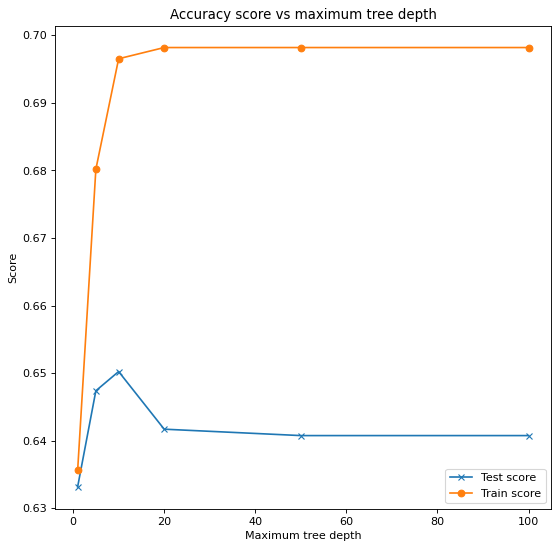

In [128]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)
plt.plot(n,score_test, marker='x', label="Test score")
plt.plot(n, score_train, marker='o', label="Train score" )
plt.legend()
plt.title("Accuracy score vs maximum tree depth")
plt.ylabel("Score")
plt.xlabel("Maximum tree depth")
print(score_train)

Changing the tree depth does not have much influence on the accuracy score. We obtain the best score for a maximum tree depth of **10**. 

#### Decision classifier changing min_sample_split

Same approach but changing the minimum sample split. 

In [130]:
n = [1, 20,30, 50, 70, 100, 200, 300, 500]
score_test = np.zeros(len(n))
score_train = np.zeros(len(n))
from sklearn.model_selection import train_test_split


for i in range(0, len(n)):
    x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=0, test_size = 0.20)
    clf = tree.DecisionTreeClassifier(splitter = "best", min_samples_leaf = n[i])
    clf = clf.fit(x_train, y_train)
    score_test[i] = clf.score(x_test, y_test) 
    score_train[i] = clf.score(x_train, y_train)

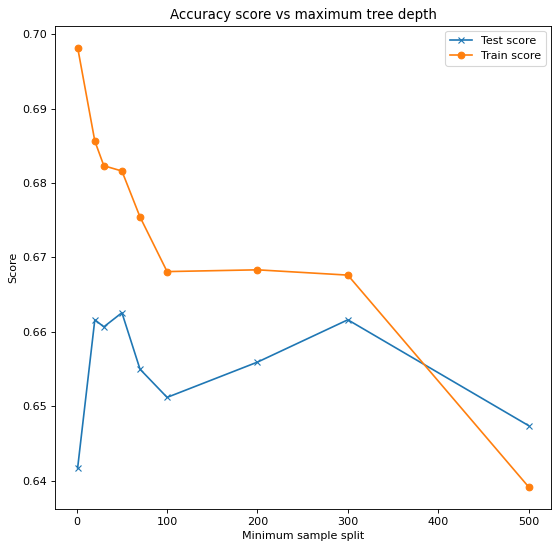

In [131]:
figure(figsize=(8, 8), dpi=80)
plt.plot(n,score_test, marker='x', label="Test score")
plt.plot(n, score_train, marker='o', label="Train score" )
plt.title("Accuracy score vs maximum tree depth")
plt.ylabel("Score")
plt.xlabel("Minimum sample split")
plt.legend()

The test score is the best for a minimum samples of **50**. In the next part we set both criteria to their best value.

#### Changing the splitter method

Using the optimal configuration we now see how different the accuracy score is depending on which strategy we use to split the nodes. 

In [125]:
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=0, test_size = 0.20)
clf = tree.DecisionTreeClassifier(splitter = "best", max_depth = 10, min_samples_leaf = 50)
clf = clf.fit(x_train, y_train)
print("******** Splitter : Best ************")
print("Test score with Strategie best {:.4f}".format(clf.score(x_test, y_test)))
print("Train score with Strategie best {:.4f}".format(clf.score(x_train, y_train)))

x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=0, test_size = 0.20)
clf = tree.DecisionTreeClassifier(splitter = "random", max_depth = n[i])
clf = clf.fit(x_train, y_train)
print("\n")
print("******** Splitter : Random ************")
print("Test score with Strategie random {:.4f}".format(clf.score(x_test, y_test)))
print("Train score with Strategie random {:.4f}".format(clf.score(x_train, y_train)))

******** Splitter : Best ************
Test score with Strategie best 0.6626
Train score with Strategie best 0.6816


******** Splitter : Random ************
Test score with Strategie random 0.6408
Train score with Strategie random 0.6982


We observe a better accuracy score using "best" strategy for splitter. 

### Analysis of the final model

Using the previous results we will build a classifier with the following caracterisitics :
- splitter : Strategy best
- max_depth : 10
- min_samples_leaf : 50

We will then analyse, evaluate and visualize the trained model

In [13]:
#Preparing the data for analysis and training
X = data.drop(columns=["two_year_recid"])
Y = data["two_year_recid"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size = 0.20)

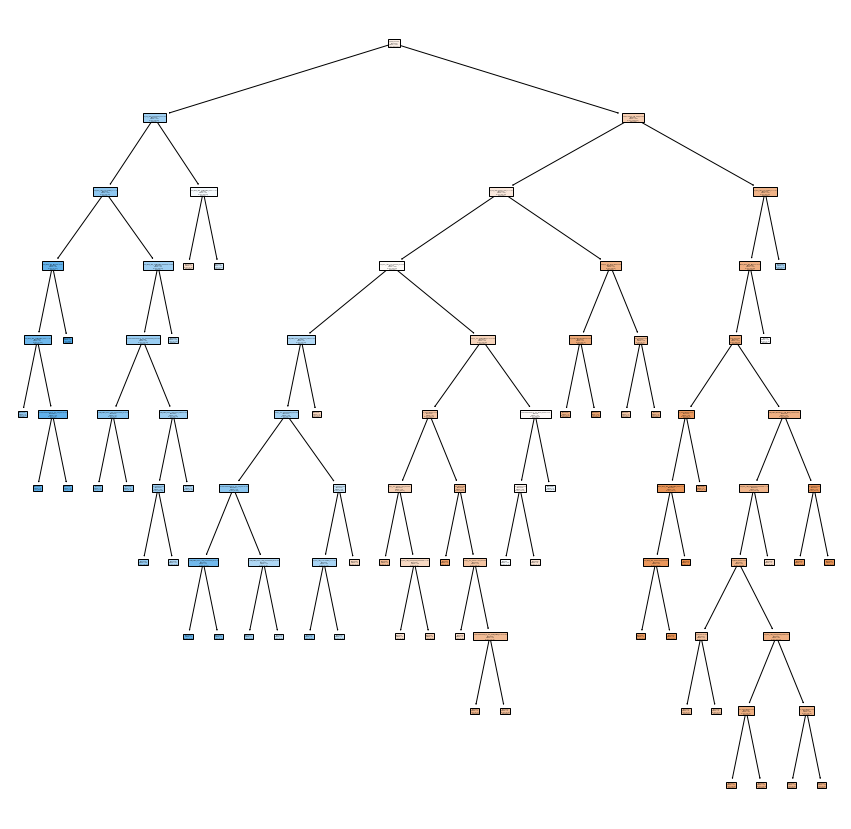

In [14]:
# Visual representation of the decision tree

clf = tree.DecisionTreeClassifier(splitter = "best", max_depth = 10, min_samples_leaf = 50)
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, 
                   feature_names= features,
                   class_names= ("Free", "Jail" ), 
                   filled=True)

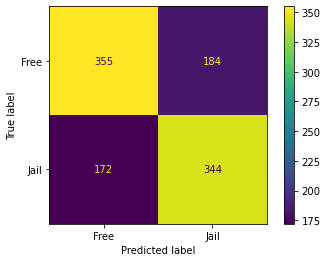

In [8]:
#Confusio matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=("Free", "Jail"))
disp.plot()


#### Analisis of the confusion matrix
Thinking about the application of this classifier, we would want to make sure that false positives (sending innocent people to change) should be as low as possible. Therefore it is one of the most important parameters. 

### Assessing the fairness of the algorithm for a particular ethnic group

There are a number of fairness criteria that will help us evaluate the fairness of the model. The most well known are Independance, Sufficiency and Separation. Here, we will only study independence 

The fairness criterion independence is satisfied if A(the sensitive feature, here ethnic group) and R(the result of the prediction) are statistically independent ($A⊥R$). This just means that every ethnic group should have an identical positive prediction rate. In this case that means that they all get sent to jail at the same rate, independtly of their true label.

We will now compute the positive prediction rate for the different ethnic groups and check if there are equal and hence that independence is satisfied. This translates into:

$\large\frac{TP_{A=a}+FP_{A=a}}{\# \ Group\ a}\overset{!}{=}\frac{TP_{A=b}+FP_{A=b}}{\# \ Group\ b}$

In [25]:
group_Black = x_test['race_African-American']==1
group_white = x_test["race_Caucasian"]==1

#compute confusion matrix for the subset according to race
cmb = confusion_matrix(y_test[group_Black], y_predict[group_Black])
cmw = confusion_matrix(y_test[group_white], y_predict[group_white])

#We get the values of the confusion matrix
tn_b, fp_b, fn_b, tp_b = cmb.ravel()
tn_w, fp_w, fn_w, tp_w = cmw.ravel()

#Calculate positive prediction rate
independence_w = (tp_w + fp_w) / (tn_w + fp_w + fn_w + tp_w)
independence_b = (tp_b + fp_b) / (tn_b + fp_b + fn_b + tp_b)

print('Independence Caucasian: {:.3f} %'.format(independence_w*100))
print('Independence African-American: {:.3f} %'.format(independence_b*100))

Independence Caucasian: 31.674 %
Independence African-American: 63.295 %


We see that the positive prediction rate for African Americans double that of Caucasians. That means that African Americans are twice as likely to get sent to jail, regardless of their true label. Hence, we can say that the classifier used here does not meet the necessary fairness requirements and should be revised. One way to make it fairer would be to use the same classifier but change the decision threshold which is by default set at 0,5. 

In [36]:
#prediting probabilities
y_proba = clf.predict_proba(x_test)
#Keeping onnly the second column with the probability it corresponds to a class 1. 
y_proba = y_proba[:,1]

y_proba_w = [1 if val >= 0.5 else 0 for val in y_proba[group_white]]
y_proba_b = [1 if val >= 0.68 else 0 for val in y_proba[group_Black]]

#compute confusion matrix for the subset according to race
cmb = confusion_matrix(y_test[group_Black], y_proba_b)
cmw = confusion_matrix(y_test[group_white], y_proba_w)

#We get the values of the confusion matrix
tn_b, fp_b, fn_b, tp_b = cmb.ravel()
tn_w, fp_w, fn_w, tp_w = cmw.ravel()

#Calculate positive prediction rate
independence_w = (tp_w + fp_w) / (tn_w + fp_w + fn_w + tp_w)
independence_b = (tp_b + fp_b) / (tn_b + fp_b + fn_b + tp_b)

print('Independence Caucasian: {:.3f} %'.format(independence_w*100))
print('Independence African-American: {:.3f} %'.format(independence_b*100))

Independence Caucasian: 31.674 %
Independence African-American: 34.584 %


After some trial and error we manage to get similar independence rates by changing the thresholds. 